Análisis frecuencial

En este ejemplo se analizará paso a paso la forma de analizar señales en el dominio de la frecuencia.
Los datos que se utilizarán corresponde a una simulación de un sensor inercial (IMU) de seis canales (acelerómetro y giróscopo). Hay datos del sensor estático y en movimiento.

Se inicia cargando los datos estáticos desde un archivo .csv. Se carga una matriz con seis columnas donde cada columna corresponde a un canal del sensor.


Text(0.5, 0, 'Muestras')

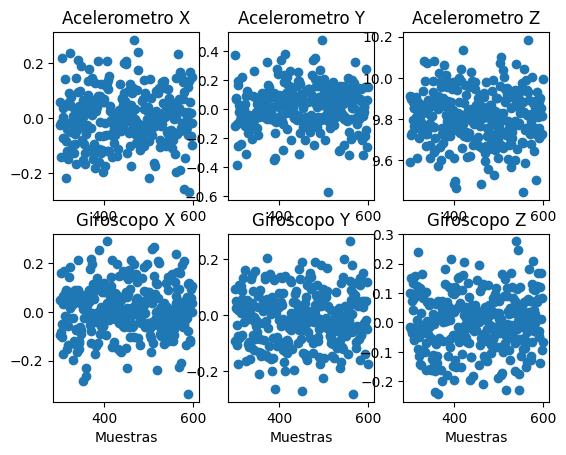

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
M = np.genfromtxt("static.csv", delimiter=",")
Ac_x = M[:,0]
Ac_y = M[:,1]
Ac_z = M[:,2]

Gy_x = M[:,3]
Gy_y = M[:,4]
Gy_z = M[:,5]

n=np.arange(len(Ac_x))
fig, axs = plt.subplots(2, 3)
axs[0, 0].scatter(n[300:599], Ac_x[300:599])
axs[0, 0].set_title("Acelerometro X")
axs[0, 1].scatter(n[300:599], Ac_y[300:599])
axs[0, 1].set_title("Acelerometro Y")
axs[0, 2].scatter(n[300:599], Ac_z[300:599])
axs[0, 2].set_title("Acelerometro Z")

axs[1, 0].scatter(n[300:599], Gy_x[300:599])
axs[1, 0].set_title("Giroscopo X")
axs[1, 0].set_xlabel("Muestras")
axs[1, 1].scatter(n[300:599], Gy_y[300:599])
axs[1, 1].set_title("Giroscopo Y")
axs[1, 1].set_xlabel("Muestras")
axs[1, 2].scatter(n[300:599], Gy_z[300:599])
axs[1, 2].set_title("Giroscopo Z")
axs[1, 2].set_xlabel("Muestras")

Los gráficos de las señales revelan formas de onda con ruido. La gráfica del acelerómetro en el eje Z presenta una forma diferente por el efecto de la gravedad. Observe como las demás están al rededor de 0.

El primer paso es calcular la FFT para cada una de las señales. Se aplica el valor absoluto para obtener el espectro de magnitud

In [46]:
FAc_x = np.absolute(np.fft.fft(Ac_x))  
FAc_y = np.absolute(np.fft.fft(Ac_y))  
FAc_z = np.absolute(np.fft.fft(Ac_z))

FGy_x = np.absolute(np.fft.fft(Gy_x)) 
FGy_y = np.absolute(np.fft.fft(Gy_y)) 
FGy_z = np.absolute(np.fft.fft(Gy_z))

Para obtener un gráfico del espectro con los valores correspondientes en Hertz (Hz). Es fundamental conocer la frecuencia de muesteo con la que se capturaron los datos. En este caso se considera que la frecuencia de muestreo es de 200 muestras/segundo.

Text(0.5, 0, 'Frecuencia (Hz)')

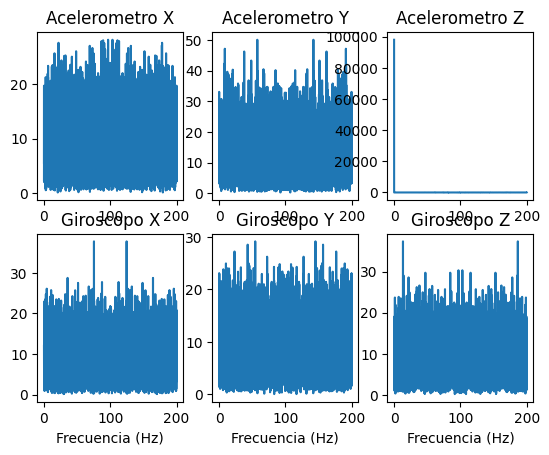

In [47]:
fr = n*200/len(FAc_x)
fig, axs = plt.subplots(2, 3)
axs[0, 0].plot(fr,FAc_x)
axs[0, 0].set_title("Acelerometro X")
axs[0, 1].plot(fr,FAc_y)
axs[0, 1].set_title("Acelerometro Y")
axs[0, 2].plot(fr,FAc_z)
axs[0, 2].set_title("Acelerometro Z")

axs[1, 0].plot(fr,FGy_x)
axs[1, 0].set_title("Giroscopo X")
axs[1, 0].set_xlabel("Frecuencia (Hz)")
axs[1, 1].plot(fr,FGy_y)
axs[1, 1].set_title("Giroscopo Y")
axs[1, 1].set_xlabel("Frecuencia (Hz)")
axs[1, 2].plot(fr,FGy_z)
axs[1, 2].set_title("Giroscopo Z")
axs[1, 2].set_xlabel("Frecuencia (Hz)")

Al observar los gráficos de los espectros de frecuencia observará varias cosas:

Existe simetria entre los intervalos 0-100 y 100-200 Hz. Esto se explica porque todas las representaciones frecuenciales de señales de tiempo discreto son periodicas y adicionalmente tienen simetría de números complejos conjugados.

El orden de magnitud (amplitud) es diferente para el Acelerómetro en el eje Z. Este eje es el que está orientado con la gravedad y presenta un nivel DC que se observa en el valor de 0 Hz. Haga zoom a la gráfica de este canal para observar el detalle en las frecuencias diferentes de 0 Hz.

La amplitud representada depende del número de muestras, es decir que entre más muestras se tengan mayor será la amplitud mostrada. Si desea conocer la amplitud de un componente, debe dividir el valor mostrado entre el número de muestras.

Dado que el sensor se encuentra quieto, no se tiene información de movimiento. Entonces lo observado representa el ancho de banda del ruido de adquisición.
